# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import darklim

sys.path.append('/Users/vetri/GitRepos/DarkELF/')
from darkelf import darkelf

from IPython.utils import io
import datetime as dt
import time

%matplotlib inline

# SPICE Parameters

In [2]:
vol_detector = 0.01 * 0.01 * 0.01 # Units of m^3
time_elapsed = 1 # Units of days
efficiency = 1. # Assume 80% efficiency of cuts/livetime
tm = 'Al2O3' # Assume a Al2O3 target mass
rho_sapphire = 3.98e3 # kg/m^3
band_gap_sapphire_eV = 8.8

mass_det = darklim.sensitivity.calculate_substrate_mass(vol_detector, tm=tm, rho=rho_sapphire) # mass of the detector in kg

energy_res = 3.73e-4 # energy resolution is 300 meV
energy_threshold = energy_res * 5

TypeError: calculate_substrate_mass() got an unexpected keyword argument 'rho'

# Background Model

There are three types backgrounds we can add easily:
1. Flat background (energy independent)
2. Noise background (the expected background from noise events being triggered)
3. DM background (a WIMP background model)
4. Exponentially falling background

If a different background function is to be inputted, one can use the `add_arb_bkgd` method.

Simulated 10496 events, with 9602 above threshold
Simulated 9445 events, with 9445 above threshold


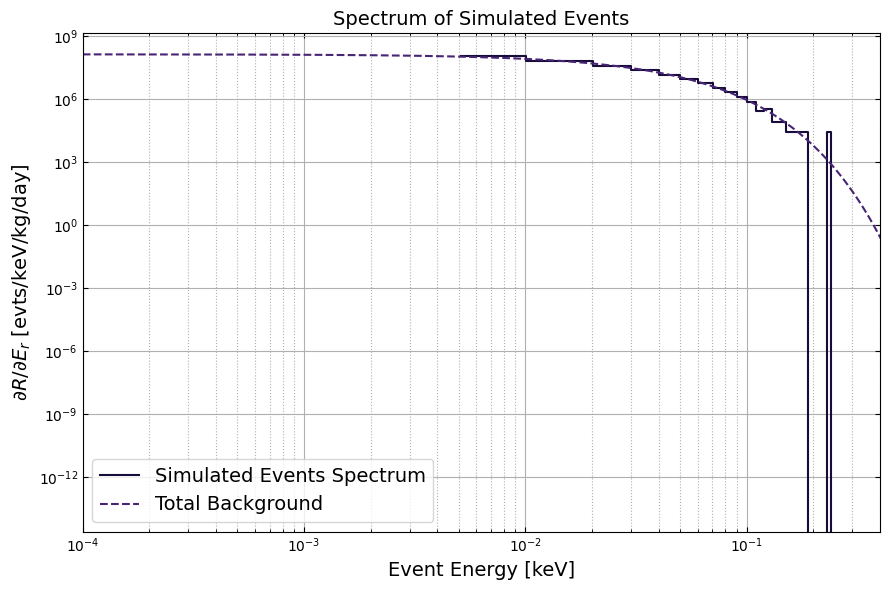

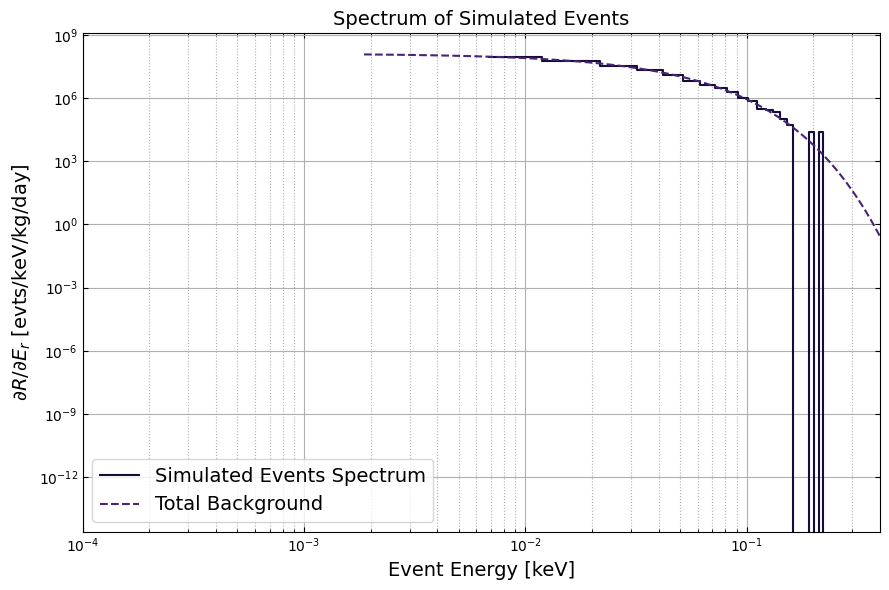

In [3]:
SE = darklim.sensitivity.SensEst(mass_det, time_elapsed, eff=efficiency, tm=tm)

# flat background of 1 DRU
#SE.add_flat_bkgd(1)

# noise background assuming 10,000 independent samples (1 ms window), using the data sample rate of 1 MHz
#SE.add_noise_bkgd(energy_res, 1e4, 1e6)

# LEE background assuming mean rate of 0.12 events/sec
SE.add_exponential_bkgd(0.020, 0.12 * 86400, normalize_mass=True)

gen_evts = SE.generate_background(e_high=1., e_low=0.0001, plot_bkgd=True, xlim=[0.0001,0.4], xscale='log')
print(f'Simulated {len(gen_evts)} events, with {sum(gen_evts > energy_threshold)} above threshold')

gen_evts = SE.generate_background(e_high=1., e_low=energy_threshold, plot_bkgd=True, xlim=[0.0001,0.4], xscale='log')
print(f'Simulated {len(gen_evts)} events, with {sum(gen_evts > energy_threshold)} above threshold')

# Signal Models

### Nuclear Recoils

10.0 MeV, 0.0 events above threshold
30.0 MeV, 0.0 events above threshold
100.0 MeV, 57.1 events above threshold
300.0 MeV, 198.0 events above threshold
1000.0 MeV, 170.5 events above threshold
3000.0 MeV, 201.1 events above threshold
10000.0 MeV, 278.5 events above threshold


/var/folders/st/tlbg96ms2yn949bx7bk8hjc00000gn/T/ipykernel_11126/746462407.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


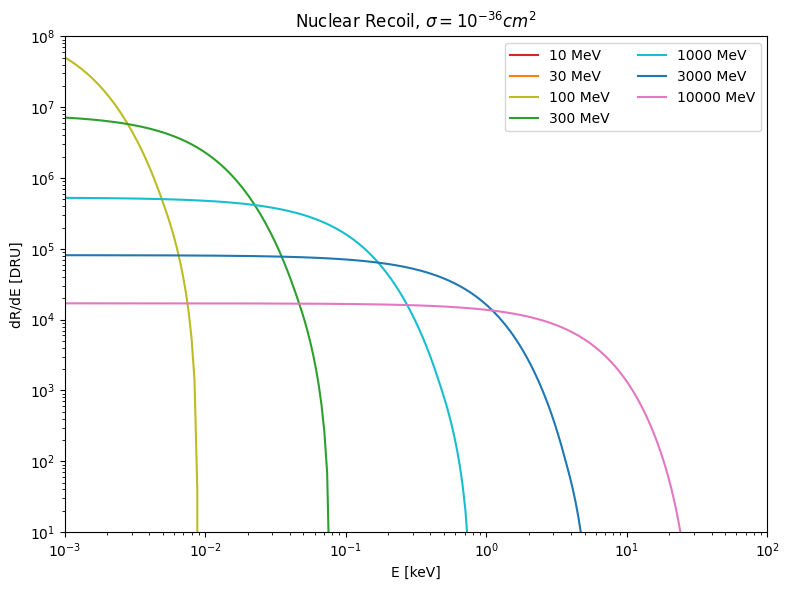

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

keV_arr = np.geomspace(1e-3, 100, 250)

for mX, color in zip([1e7, 3e7, 1e8, 3e8, 1e9, 3e9, 1e10], 
                     ['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b']):

    dRdE_arr = darklim.limit._limit.drde(keV_arr, mX / 1e9, 1e-36, 'Al2O3')
    ax.plot(keV_arr, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)

    n_above_threshold = np.trapz(dRdE_arr[keV_arr > energy_threshold], keV_arr[keV_arr > energy_threshold]) * time_elapsed * mass_det
    print(f'{mX / 1e6} MeV, {n_above_threshold:.1f} events above threshold')
  
ax.set_yscale("log")
ax.set_xscale('log')
ax.set_ylim([1e1, 1e8])
ax.set_xlim([keV_arr[0], keV_arr[-1]])

ax.set_xlabel("E [keV]")
ax.set_ylabel("dR/dE [DRU]")
ax.set_title(r'Nuclear Recoil, $\sigma = 10^{-36} cm^2$')

ax.legend(ncol=2, fontsize=10, loc="upper right")
fig.tight_layout()
fig.show()

Starting Experiment 0
  Finished mass 0, 0.01000 GeV. Found sigma = inf cm2.
  Finished mass 1, 0.01212 GeV. Found sigma = inf cm2.
  Finished mass 2, 0.01468 GeV. Found sigma = inf cm2.
  Finished mass 3, 0.01778 GeV. Found sigma = inf cm2.
  Finished mass 4, 0.02154 GeV. Found sigma = inf cm2.
  Finished mass 5, 0.02610 GeV. Found sigma = inf cm2.
  Finished mass 6, 0.03162 GeV. Found sigma = inf cm2.
  Finished mass 7, 0.03831 GeV. Found sigma = inf cm2.
  Finished mass 8, 0.04642 GeV. Found sigma = 5.423e-32 cm2.
  Finished mass 9, 0.05623 GeV. Found sigma = 1.726e-34 cm2.
  Finished mass 10, 0.06813 GeV. Found sigma = 3.596e-35 cm2.
  Finished mass 11, 0.08254 GeV. Found sigma = 1.371e-35 cm2.
  Finished mass 12, 0.10000 GeV. Found sigma = 8.182e-36 cm2.
  Finished mass 13, 0.12115 GeV. Found sigma = 6.590e-36 cm2.
  Finished mass 14, 0.14678 GeV. Found sigma = 6.730e-36 cm2.
  Finished mass 15, 0.17783 GeV. Found sigma = 8.108e-36 cm2.
  Finished mass 16, 0.21544 GeV. Found sigma

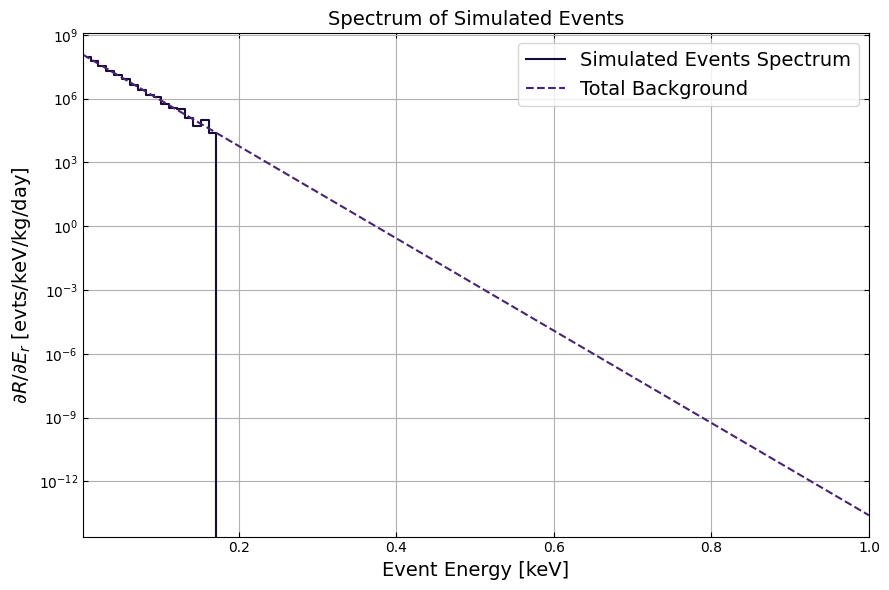

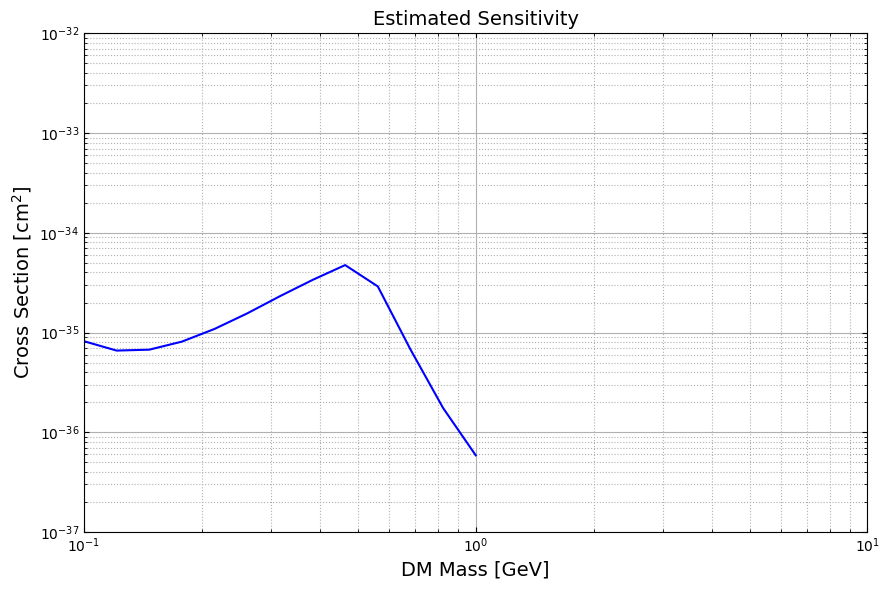

In [5]:
if False:
    SE.reset_sim()

    # flat background of 1 DRU
    SE.add_flat_bkgd(1)
    # noise background assuming 10,000 independent samples (1 ms window), using the data sample rate of 1 MHz
    SE.add_noise_bkgd(energy_res, 1e4, 1e6)
    # LEE background assuming mean rate of 0.12 events/sec
    SE.add_exponential_bkgd(0.020, 0.12 * 86400, normalize_mass=True)


# run the simulation for 1 experiment
t_start = time.time()
m_dm, sigs = SE.run_sim(
    threshold=energy_threshold,
    e_low=energy_threshold,
    e_high=1,
    m_dms=np.geomspace(0.01, 1, num=25),
    plot_bkgd=True,
    nexp=1, # increase for a better estimate, 1 is generally used for diagnostics
    sigma0=1e-36,
)
sig = np.median(np.stack(sigs, axis=1), axis=1)
t_end = time.time()
print(f'Simulation took {(t_end - t_start):.2f} seconds')

fn = 'sapphire_results/NR_Limit_' + dt.datetime.now().strftime('%Y%m%d_%H%M%S') + '.txt'
np.savetxt(fn, np.vstack([m_dm, sig]).transpose(), fmt='%.3e')

fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(m_dm, sig, color='b')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e-37, 1e-32)
ax.set_xlim(0.1, 10)
ax.set_xlabel("DM Mass [GeV]", fontsize=14)
ax.set_ylabel("Cross Section [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

fig.tight_layout()

### DM-Electron Scattering, Massless Mediator

10.0 MeV, 163.3 events above threshold
30.0 MeV, 1001.4 events above threshold
100.0 MeV, 619.3 events above threshold
300.0 MeV, 248.9 events above threshold
1000.0 MeV, 79.5 events above threshold
3000.0 MeV, 27.0 events above threshold
10000.0 MeV, 8.1 events above threshold


/var/folders/st/tlbg96ms2yn949bx7bk8hjc00000gn/T/ipykernel_11126/4086379164.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


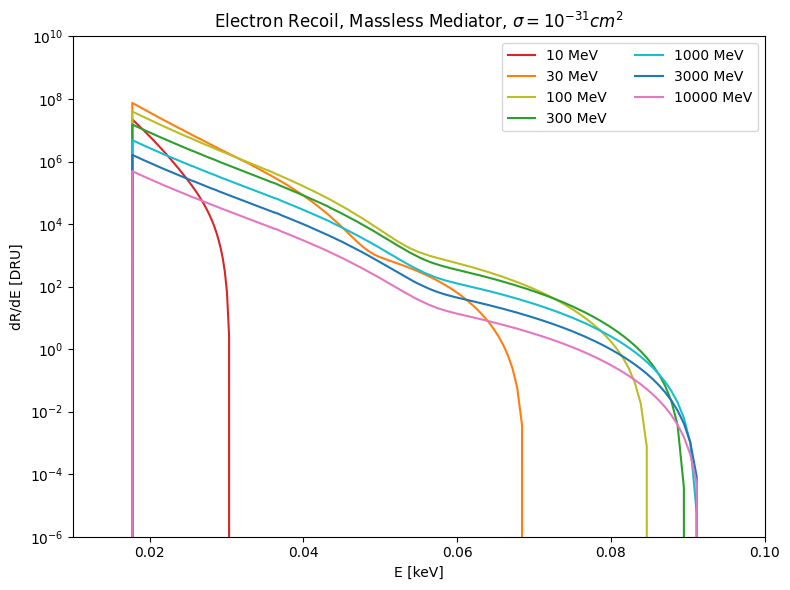

In [7]:
# Note the dimensional analysis in this cell
# DarkELF expects recoil energies and WIMP masses in eV, and returns rates in counts/kg/yr/eV
# But DarkLim expects recoil energies in keV, WIMP masses in GeV, and rates in counts/kg/day/keV (DRU)

mX_arr_eV = np.array([1e7, 3e7, 1e8, 3e8, 1e9, 3e9, 1e10])
color_arr = np.array(['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b'])
keV_arr = np.geomspace(10e-3, 100e-3, 250)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i, (mX, color) in enumerate(zip(mX_arr_eV, color_arr)):

    # Initialize each DarkELF Al2O3 object
    if i == 0:
        print('WARNING: You are suppressing DarkELF output')
    with io.capture_output() as captured:
        darkelf_sapphire = darkelf(target='Al2O3', filename="Al2O3_mermin.dat")

    darkelf_sapphire.update_params(mX=mX, mediator='massless')
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * band_gap_sapphire_eV, 1) * \
                                    darkelf_sapphire.dRdomega_electron(keV * 1000, method="grid", sigmae=1e-31, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)
    
    ax.plot(keV_arr, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)

    n_above_threshold = np.trapz(dRdE_arr[keV_arr > energy_threshold], keV_arr[keV_arr > energy_threshold]) * time_elapsed * mass_det
    print(f'{mX / 1e6} MeV, {n_above_threshold:.1f} events above threshold')
  
ax.set_yscale("log")
#ax.set_xscale('log')
ax.set_ylim([1e-6, 1e10])
ax.set_xlim([keV_arr[0], keV_arr[-1]])

ax.set_xlabel("E [keV]")
ax.set_ylabel("dR/dE [DRU]")
ax.set_title(r'Electron Recoil, Massless Mediator, $\sigma = 10^{-31} cm^2$')

ax.legend(ncol=2, fontsize=10, loc="upper right")
fig.tight_layout()
fig.show()

We try two methods of passing the DarkELF dRdomega_electron() function to DarkLim: defining an anonymous function in this Jupyter notebook, and getting an anonymous function from _sens_est.py. In theory, they are equivalent, but for some reason, only the latter method works. So the former method is grayed out, but we keep it for posterity.

Starting Experiment 0
  Finished mass 0, 0.01000 GeV. Found sigma = 3.110e-31 cm2.
  Finished mass 1, 0.01638 GeV. Found sigma = 1.150e-31 cm2.


KeyboardInterrupt: 

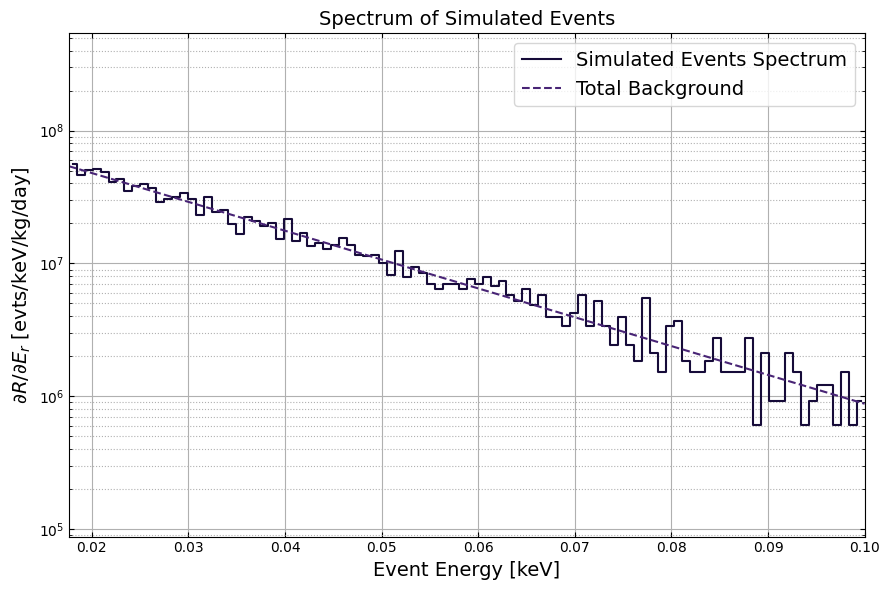

In [7]:
mX_arr_eV = np.geomspace(1e7, 1e10, 15)
mX_arr_GeV = mX_arr_eV / 1e9

# Run the simulation
t_start = time.time()
m_dm, sigs = SE.run_sim(
    threshold=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_low=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_high=0.1,
    m_dms=mX_arr_GeV,
    plot_bkgd=True,
    nexp=1, # increase for a better estimate, 1 is generally used for diagnostics
    sigma0=1e-31,
    elf_model='electron',
    elf_params={'mediator': 'massless', 'kcut': 0, 'suppress_darkelf_output': True},
)
sig = np.median(np.stack(sigs, axis=1), axis=1)
t_end = time.time()
print(f'Simulation took {(t_end - t_start):.2f} seconds')

fn = 'sapphire_results/Massless_ER_Limit_' + dt.datetime.now().strftime('%Y%m%d_%H%M%S') + '.txt'
np.savetxt(fn, np.vstack([m_dm, sig]).transpose(), fmt='%.3e')

f_out = open(fn + '_detailed', 'w')
f_out.write(str(m_dm))
f_out.write('\n')
f_out.write(str(sigs))
f_out.write('\n')
f_out.close()



fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(m_dm, sig, color='b')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim(1e-37, 1e-32)
#ax.set_xlim(0.1, 10)
ax.set_xlabel("DM Mass [GeV]", fontsize=14)
ax.set_ylabel("Cross Section [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

fig.tight_layout()

### DM-Electron Scattering, Massive Mediator

10.0 MeV, 49.7 events above threshold
   After selecting k < 25 keV, 49.7 events above threshold
30.0 MeV, 387.8 events above threshold
   After selecting k < 25 keV, 380.7 events above threshold
100.0 MeV, 250.0 events above threshold
   After selecting k < 25 keV, 243.3 events above threshold
300.0 MeV, 101.1 events above threshold
   After selecting k < 25 keV, 98.2 events above threshold
1000.0 MeV, 32.4 events above threshold
   After selecting k < 25 keV, 31.4 events above threshold
3000.0 MeV, 11.0 events above threshold
   After selecting k < 25 keV, 10.7 events above threshold
10000.0 MeV, 3.3 events above threshold
   After selecting k < 25 keV, 3.2 events above threshold


/var/folders/st/tlbg96ms2yn949bx7bk8hjc00000gn/T/ipykernel_9657/3596589769.py:51: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


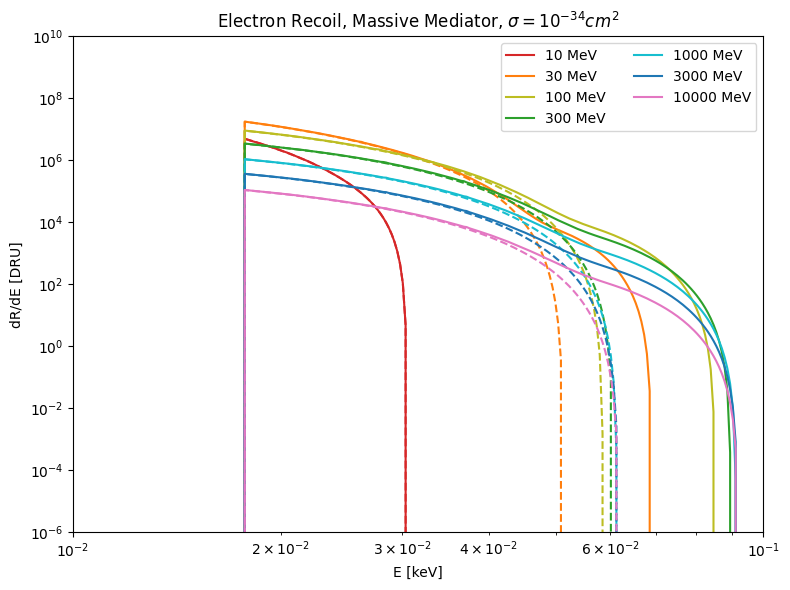

In [5]:
# Note the dimensional analysis in this cell
# DarkELF expects recoil energies and WIMP masses in eV, and returns rates in counts/kg/yr/eV
# But DarkLim expects recoil energies in keV, WIMP masses in GeV, and rates in counts/kg/day/keV (DRU)

mX_arr_eV = np.array([1e7, 3e7, 1e8, 3e8, 1e9, 3e9, 1e10])
color_arr = np.array(['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b'])
keV_arr = np.geomspace(10e-3, 100e-3, 250)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i, (mX, color) in enumerate(zip(mX_arr_eV, color_arr)):

    # Initialize each DarkELF Al2O3 object
    if i == 0:
        print('WARNING: You are suppressing DarkELF output')
    with io.capture_output() as captured:
        darkelf_sapphire = darkelf(target='Al2O3', filename="Al2O3_mermin.dat")

    darkelf_sapphire.update_params(mX=mX, mediator='massive')

    # No cut on k
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * band_gap_sapphire_eV, 1) * \
                                    darkelf_sapphire.dRdomega_electron(keV * 1000, method="grid", sigmae=1e-34, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)
    
    ax.plot(keV_arr, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)

    n_above_threshold = np.trapz(dRdE_arr[keV_arr > energy_threshold], keV_arr[keV_arr > energy_threshold]) * time_elapsed * mass_det
    print(f'{mX / 1e6} MeV, {n_above_threshold:.1f} events above threshold')

    # With a 25 keV cut on k (without cut, max k is 37 keV)
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * band_gap_sapphire_eV, 1) * \
                                    darkelf_sapphire.dRdomega_electron(keV * 1000, method="grid", sigmae=1e-34, kcut=25e3, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)
    
    ax.plot(keV_arr, dRdE_arr, '--', color=color)

    n_above_threshold = np.trapz(dRdE_arr[keV_arr > energy_threshold], keV_arr[keV_arr > energy_threshold]) * time_elapsed * mass_det
    print(f'   After selecting k < 25 keV, {n_above_threshold:.1f} events above threshold')

ax.set_yscale("log")
ax.set_xscale('log')
ax.set_ylim([1e-6, 1e10])
ax.set_xlim([keV_arr[0], keV_arr[-1]])

ax.set_xlabel("E [keV]")
ax.set_ylabel("dR/dE [DRU]")
ax.set_title(r'Electron Recoil, Massive Mediator, $\sigma = 10^{-34} cm^2$')

ax.legend(ncol=2, fontsize=10, loc="upper right")
fig.tight_layout()
fig.show()

Starting Experiment 0
Simulated 3336 events
  Finished mass 0, 0.01000 GeV. Found sigma = 1.556e-33 cm2.
  Finished mass 1, 0.01638 GeV. Found sigma = 5.019e-34 cm2.
  Finished mass 2, 0.02683 GeV. Found sigma = 3.916e-34 cm2.
  Finished mass 3, 0.04394 GeV. Found sigma = 4.382e-34 cm2.
  Finished mass 4, 0.07197 GeV. Found sigma = 5.839e-34 cm2.
  Finished mass 5, 0.11788 GeV. Found sigma = 8.506e-34 cm2.
  Finished mass 6, 0.19307 GeV. Found sigma = 1.301e-33 cm2.
  Finished mass 7, 0.31623 GeV. Found sigma = 2.046e-33 cm2.
  Finished mass 8, 0.51795 GeV. Found sigma = 3.271e-33 cm2.
  Finished mass 9, 0.84834 GeV. Found sigma = 5.279e-33 cm2.
  Finished mass 10, 1.38950 GeV. Found sigma = 8.570e-33 cm2.
  Finished mass 11, 2.27585 GeV. Found sigma = 1.396e-32 cm2.
  Finished mass 12, 3.72759 GeV. Found sigma = 2.279e-32 cm2.
  Finished mass 13, 6.10540 GeV. Found sigma = 3.725e-32 cm2.
  Finished mass 14, 10.00000 GeV. Found sigma = 6.094e-32 cm2.

Simulation took 2213.48 seconds


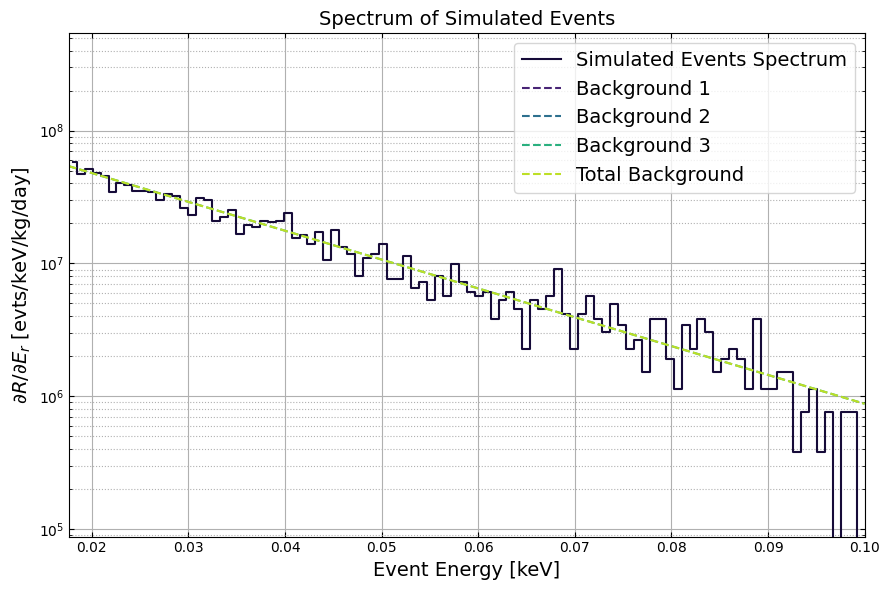

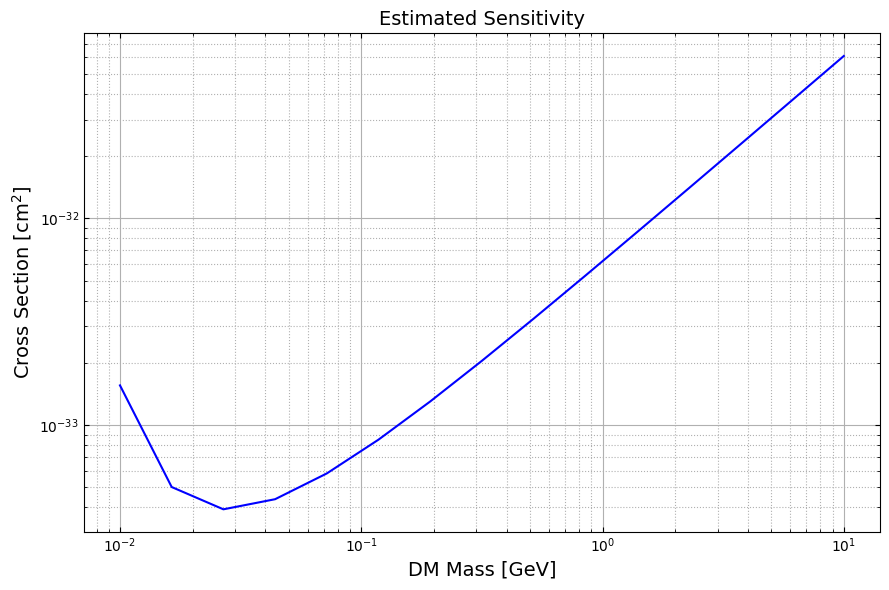

In [6]:
mX_arr_eV = np.geomspace(1e7, 1e10, 15)
mX_arr_GeV = mX_arr_eV / 1e9

# Run the simulation
t_start = time.time()
m_dm, sigs = SE.run_sim(
    threshold=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_low=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_high=0.1,
    m_dms=mX_arr_GeV,
    plot_bkgd=True,
    nexp=1, # increase for a better estimate, 1 is generally used for diagnostics
    sigma0=1e-31,
    elf_model='electron',
    elf_params={'mediator': 'massive', 'kcut': 0, 'suppress_darkelf_output': True},
)
sig = np.median(np.stack(sigs, axis=1), axis=1)
t_end = time.time()
print(f'Simulation took {(t_end - t_start):.2f} seconds')

fn = 'sapphire_results/Massive_ER_kcut_None_Limit_' + dt.datetime.now().strftime('%Y%m%d_%H%M%S') + '.txt'
np.savetxt(fn, np.vstack([m_dm, sig]).transpose(), fmt='%.3e')

f_out = open(fn + '_detailed', 'w')
f_out.write(str(m_dm))
f_out.write('\n')
f_out.write(str(sigs))
f_out.write('\n')
f_out.close()



fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(m_dm, sig, color='b')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim(1e-37, 1e-32)
#ax.set_xlim(0.1, 10)
ax.set_xlabel("DM Mass [GeV]", fontsize=14)
ax.set_ylabel("Cross Section [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

fig.tight_layout()

Starting Experiment 0
Simulated 3287 events
  Finished mass 0, 0.01000 GeV. Found sigma = 1.404e-33 cm2.
  Finished mass 1, 0.01638 GeV. Found sigma = 4.801e-34 cm2.
  Finished mass 2, 0.02683 GeV. Found sigma = 3.789e-34 cm2.
  Finished mass 3, 0.04394 GeV. Found sigma = 4.219e-34 cm2.
  Finished mass 4, 0.07197 GeV. Found sigma = 5.604e-34 cm2.
  Finished mass 5, 0.11788 GeV. Found sigma = 8.151e-34 cm2.
  Finished mass 6, 0.19307 GeV. Found sigma = 1.246e-33 cm2.
  Finished mass 7, 0.31623 GeV. Found sigma = 1.958e-33 cm2.
  Finished mass 8, 0.51795 GeV. Found sigma = 3.130e-33 cm2.
  Finished mass 9, 0.84834 GeV. Found sigma = 5.050e-33 cm2.
  Finished mass 10, 1.38950 GeV. Found sigma = 8.198e-33 cm2.
  Finished mass 11, 2.27585 GeV. Found sigma = 1.335e-32 cm2.
  Finished mass 12, 3.72759 GeV. Found sigma = 2.180e-32 cm2.
  Finished mass 13, 6.10540 GeV. Found sigma = 3.563e-32 cm2.
  Finished mass 14, 10.00000 GeV. Found sigma = 5.829e-32 cm2.

Simulation took 1126.52 seconds


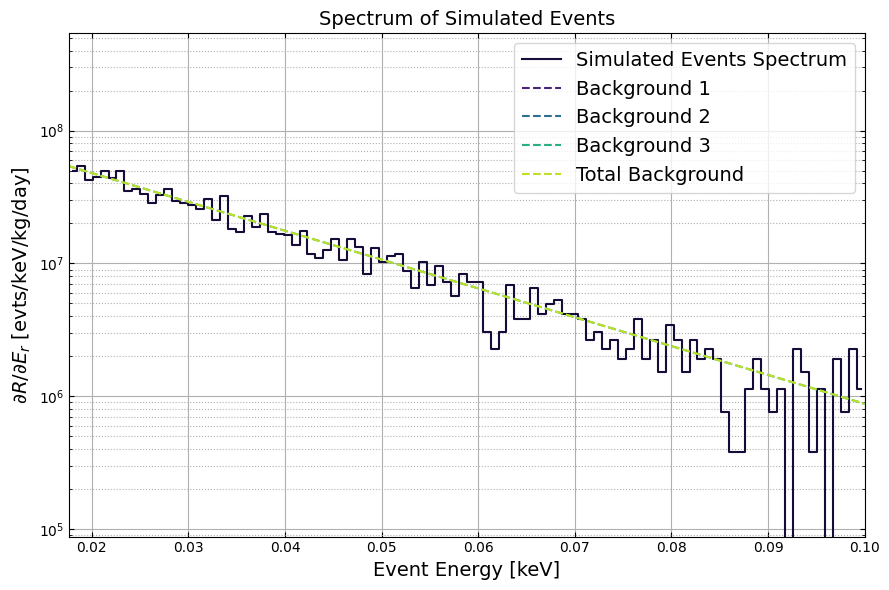

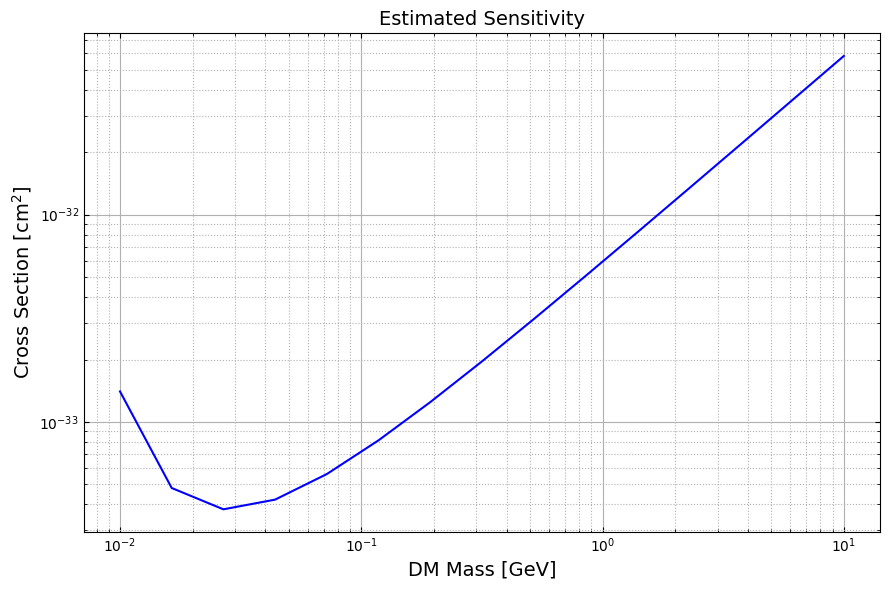

In [7]:
mX_arr_eV = np.geomspace(1e7, 1e10, 15)
mX_arr_GeV = mX_arr_eV / 1e9

# Run the simulation
t_start = time.time()
m_dm, sigs = SE.run_sim(
    threshold=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_low=max(energy_threshold, 2 * band_gap_sapphire_eV / 1000),
    e_high=0.1,
    m_dms=mX_arr_GeV,
    plot_bkgd=True,
    nexp=1, # increase for a better estimate, 1 is generally used for diagnostics
    sigma0=1e-31,
    elf_model='electron',
    elf_params={'mediator': 'massive', 'kcut': 25e3, 'suppress_darkelf_output': True},
)
sig = np.median(np.stack(sigs, axis=1), axis=1)
t_end = time.time()
print(f'Simulation took {(t_end - t_start):.2f} seconds')

fn = 'sapphire_results/Massive_ER_kcut_25keV_Limit_' + dt.datetime.now().strftime('%Y%m%d_%H%M%S') + '.txt'
np.savetxt(fn, np.vstack([m_dm, sig]).transpose(), fmt='%.3e')

f_out = open(fn + '_detailed', 'w')
f_out.write(str(m_dm))
f_out.write('\n')
f_out.write(str(sigs))
f_out.write('\n')
f_out.close()



fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(m_dm, sig, color='b')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim(1e-37, 1e-32)
#ax.set_xlim(0.1, 10)
ax.set_xlabel("DM Mass [GeV]", fontsize=14)
ax.set_ylabel("Cross Section [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

fig.tight_layout()